# Watching Friends the show from a machine learning perspective and predicting the gender of each episode's director 

Friends Series Dataset
Data source - https://www.kaggle.com/rezaghari/friends-series-dataset

In [1]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100)

from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

Friends = pd.read_csv('C:\\Kaggle\\DataSet\\Friends Series Dataset\\friends_episodes.csv')
Friends.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""real world"" after she leaves her fianc� at the altar.",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel returns her engagement ring to Barry. Monica beco...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes her new boyfriend more than she does. Chandler resu...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game to take his mind off the anniversary of the first t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends his washroom is rat-infested so he can join her a...",Pamela Fryman,8.5,4438


In [2]:
Friends.describe()

,Year_of_prod,Season,Episode Number,Duration,Stars,Votes
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,1998.961864,5.377119,12.377119,22.338983,8.458898,3369.605932
std,2.843924,2.814428,6.936010,1.514303,0.396320,864.431311
min,1994.000000,1.000000,1.000000,22.000000,7.200000,2557.000000
25%,1997.000000,3.000000,6.000000,22.000000,8.200000,2886.750000
50%,1999.000000,5.000000,12.000000,22.000000,8.400000,3148.500000
75%,2001.000000,8.000000,18.000000,22.000000,8.700000,3583.500000
max,2004.000000,10.000000,25.000000,30.000000,9.700000,10381.000000


In [3]:
# Create a categorical feature based on the gender of directors
Friends.Director.unique()

array(['James Burrows', 'Pamela Fryman', 'Arlene Sanford', 'Peter Bonerz',
       'Paul Lazarus', 'Alan Myerson', 'Michael Lembeck', 'Gail Mancuso',
       'Robby Benson', 'Kevin Bright', 'Ellen Gittelsohn',
       'Mary Kay Place', 'Thomas Schlamme', 'Steve Zuckerman',
       'Terry Hughes', 'Sam Simon', 'Shelley Jensen', 'Gary Halvorson',
       'David Steinberg', 'Dana De Vally Piazza', 'Joe Regalbuto',
       'Andrew Tsao', 'Todd Holland', 'David Schwimmer', 'Ben Weiss',
       'Stephen Prime', 'Sheldon Epps', 'Roger Christiansen'],
      dtype=object)

In [4]:
Friends['Gender'] = ['Female' if x =='Arlene Sanford' or x =='Ellen Gittelsohn' or x =='Gail Mancuso' or x =='Mary Kay Place' or x =='Pamela Fryman' or x =='Shelley Jensen' else 'Male' for x in Friends['Director']]

In [5]:
Friends.groupby(['Gender', 'Year_of_prod'], as_index=False).mean().groupby('Gender')['Stars'].mean()

Gender
Female    8.383016
Male      8.471200
Name: Stars, dtype: float64

In [6]:
# Remove punctuation, tokenization, remove Stopwords, and stemming
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [7]:
# Apply TfidfVectorizer, tried Count Vectorization, too

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(Friends['Summary'])
X_tfidf.shape

(236, 1284)

In [8]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns = tfidf_vect.get_feature_names()
X_tfidf_df

,,18,1950,30th,35th,50,7000,accent,accept,accident,...,wreak,write,writer,wrong,wrote,year,yeller,yeti,york,younger
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.321919,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.135962,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.148993,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_features = pd.concat([Friends['Stars'], Friends['Votes'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,Stars,Votes,0,1,2,3,4,5,6,7,...,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283
0,8.3,7440,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.1,4888,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.2,4605,0.0,0.0,0.0,0.0,0.0,0.0,0.321919,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.1,4468,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.5,4438,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Test RandomForest Classifier Attributes and Parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_features, Friends['Gender'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.85416667, 0.72340426, 0.89361702, 1.        , 1.        ])

In [11]:
# Explore RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Friends['Gender'], test_size=0.2)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=60, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.02060065331750989, 697),
 (0.0176085365755141, 1111),
 (0.015611145408068731, 628),
 (0.014057098487549012, 1099),
 (0.013960074250807678, 640),
 (0.013717107209112416, 410),
 (0.01293175161758845, 384),
 (0.012490189760587711, 561),
 (0.01225384311682704, 1044),
 (0.011838975882131102, 519)]

In [13]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='Female', average='weighted')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.803 / Recall: 0.896 / Accuracy: 0.896


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
# Build Grid-search
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, Friends['Gender'], test_size=0.2)

def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='Female', average='weighted')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [15]:
for n_est in [10, 50, 100, 150]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 10 / Depth: 10 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 10 / Depth: 20 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 10 / Depth: 30 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 10 / Depth: None ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 10 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 20 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 30 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: None ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 100 / Depth: 10 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 100 / Depth: 20 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 100 / Depth: 30 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 100 / Depth: None ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 150 / Depth: 10 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 150 / Depth: 20 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 150 / Depth: 30 ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854
Est: 150 / Depth: None ---- Precision: 0.73 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
# Explore Gradient Boosting model with grid-search - Exhaustively search all parameter combinations in a given grid to determine the best model.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, Friends['Gender'], test_size=0.2)

def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Female', average='weighted')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3)))

In [17]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.766 / Recall: 0.875 / Accuracy: 0.875
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 0.766 / Recall: 0.875 / Accuracy: 0.875


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 0.766 / Recall: 0.875 / Accuracy: 0.875


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.766 / Recall: 0.875 / Accuracy: 0.875


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.766 / Recall: 0.875 / Accuracy: 0.875


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 100 / Depth: 3 / LR: 0.01 ---- Precision: 0.766 / Recall: 0.875 / Accuracy: 0.875


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 100 / Depth: 3 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 100 / Depth: 3 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 100 / Depth: 7 / LR: 0.01 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 100 / Depth: 7 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 100 / Depth: 7 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 100 / Depth: 11 / LR: 0.01 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 100 / Depth: 11 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 100 / Depth: 11 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 100 / Depth: 15 / LR: 0.01 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 100 / Depth: 15 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 100 / Depth: 15 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Est: 150 / Depth: 3 / LR: 0.01 ---- Precision: 0.766 / Recall: 0.875 / Accuracy: 0.875


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 150 / Depth: 3 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 150 / Depth: 3 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 150 / Depth: 7 / LR: 0.01 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 150 / Depth: 7 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 150 / Depth: 7 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 150 / Depth: 11 / LR: 0.01 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 150 / Depth: 11 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 150 / Depth: 11 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Est: 150 / Depth: 15 / LR: 0.01 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 150 / Depth: 15 / LR: 0.1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854
Est: 150 / Depth: 15 / LR: 1 ---- Precision: 0.763 / Recall: 0.854 / Accuracy: 0.854


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [18]:
# Model selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Friends[['Summary', 'Stars', 'Votes']], Friends['Gender'], test_size=0.2)

In [19]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['Summary'])

tfidf_train = tfidf_vect_fit.transform(X_train['Summary'])
tfidf_test = tfidf_vect_fit.transform(X_test['Summary'])

X_train_vect = pd.concat([X_train[['Stars', 'Votes']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Stars', 'Votes']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Stars,Votes,0,1,2,3,4,5,6,7,...,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112
0,8.6,2860,0.154946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,8.6,3139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.213956,0.0,0.0,0.0,0.0
2,8.1,2703,0.143791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,8.4,2961,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,7.9,3769,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [20]:
#Final evaluation of models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

rf = RandomForestClassifier(n_estimators=60, max_depth=20, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Female', average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 0.155 / Predict time: 0.125 ---- Precision: 0.803 / Recall: 0.896 / Accuracy: 0.896


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=3)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Female', average='weighted')
print('Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Fit time: 0.174 / Predict time: 0.002 ---- Precision: 0.801 / Recall: 0.875 / Accuracy: 0.875


C:\Users\yingl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'Female') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


### Bonus: Visualize the frequent words in the show's transcripts
##### Data source: 
FRIENDS TV Series - Screenplay Script 
https://www.kaggle.com/blessondensil294/friends-tv-series-screenplay-script

In [22]:
import os
for dirname, _, filenames in os.walk('C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E01 Monica Gets A Roommate.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E02 The Sonogram At The End.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E03 The Thumb.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E04 George Stephanopoulos.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E05 The East German Laundry Detergent.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E06 The Butt.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E07 The Blackout.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E08 Nana Dies Twice.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E09 Underdog Gets Away.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E10 The Monkey.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E11 Mrs. Bing.txt
C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script\S01E12 The Dozen Lasagnas.txt
C:\Kaggle\

In [23]:
import glob
text = ""
folder_name = "C:\Kaggle\DataSet\FRIENDS-TV-Series-Screenplay-Script"
for f in glob.glob(folder_name + '/*.txt'):
    temp = open(f,'r',encoding='utf-8')
    text += temp.read()
    temp.close()
len(text)
print(text[0:300])

The One Where Monica Gets a New Roommate (The Pilot-The Uncut Version)
Written by: Marta Kauffman & David Crane


[Scene: Central Perk, Chandler, Joey, Phoebe, and Monica are there.]

Monica: There's nothing to tell! He's just some guy I work with!

Joey: C'mon, you're going out with the guy! There'


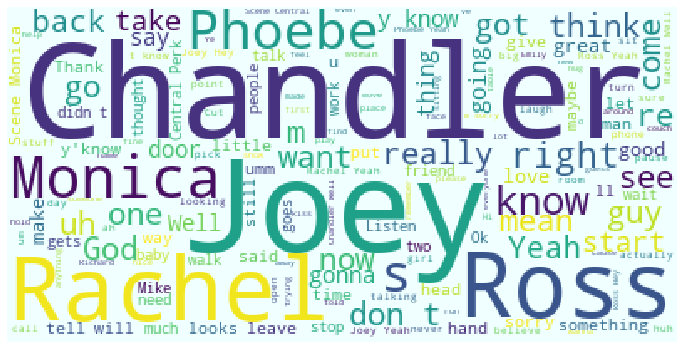

In [25]:
# Create stopword list:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Add more words to ignore 
stopwords.update(["oh","Ro","wa","thi", "okay","jut", "look"])

#Redo stop words. Limit number of words
wordcloud = WordCloud(stopwords=stopwords, max_words=200, background_color="azure").generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()